<a href="https://colab.research.google.com/github/rghimre3/INFO5505_Machine_Learning_for_Data_Scientist/blob/main/Ghimire_ramesh_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text Classification with Naive Bayes

Assignment description: TextClassificationwithNaive Bayes.docxDownload TextClassificationwithNaive Bayes.docx

Data set: all_sentiment_shuffled.rtf

In [87]:
# Importing necessary libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import base64
import requests
import re
from stop_words import get_stop_words
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [78]:
# importing the data 
data_txt = requests.get(' http://www.cse.chalmers.se/~richajo/dit862/data/all_sentiment_shuffled.txt')
reviews = data_txt.text

In [79]:
reviews

'music neg 241.txt i bought this album because i loved the title song . it \'s such a great song , how bad can the rest of the album be , right ? well , the rest of the songs are just filler and are n\'t worth the money i paid for this . it \'s either shameless bubblegum or oversentimentalized depressing tripe . kenny chesney is a popular artist and as a result he is in the cookie cutter category of the nashville music scene . he \'s gotta pump out the albums so the record company can keep lining their pockets while the suckers out there keep buying this garbage to perpetuate more garbage coming out of that town . i \'ll get down off my soapbox now . but country music really needs to get back to it \'s roots and stop this pop nonsense . what country music really is and what it is considered to be by mainstream are two different things . \nmusic neg 544.txt i was misled and thought i was buying the entire cd and it contains one song \nbooks neg 729.txt i have introduced many of my ell ,

In [80]:
# Method to return the topics from the response data object
def returnTopics():
  listOfTopics = []
  for sentence in reviews.splitlines():
    listOfTopics.append(sentence.split()[0])
  return listOfTopics

# return the Labels from the response data object by replacing the Neg labels to 0 and Positive labels to 1.
def returnLabels():
  listOfLabel = []
  for sentence in reviews.splitlines():
    if sentence.split()[1] == 'neg':
      listOfLabel.append(0)
    elif sentence.split()[1] == 'pos':
      listOfLabel.append(1)
  return listOfLabel

# return the document ID from the response data object
def returnDocumentID():
  listOfDocID = []
  for sentence in reviews.splitlines():
    listOfDocID.append(sentence.split()[2])
  return listOfDocID

# return the reviews from the response data object
def returnReviews():
  listOfReviews = []
  for sentence in reviews.splitlines():
    listOfReviews.append(' '.join(itemTok for itemTok in sentence.split()[3:]))
  return listOfReviews

#process the reviews by removing the Digits, spaces, Stopwords and Single and two word items from the reviews
def reviewsProcessing(reviews_in):
  stopWords = get_stop_words('en')
  reviews_in = reviews_in.str.replace('[^\w\s]','')
  return reviews_in.apply(lambda item: ' '.join([item for item in str(item).split() if not item.isdigit() and not item.isspace() and item not in stopWords]))

# remove single words from the reviews 
def removesinglewords(reviews_in):
   shortWord = re.compile(r'\W*\b\w{1,2}\b')
   listOfReviews = []
   for review in reviews_in:
     item = shortWord.sub('', review)
     listOfReviews.append(item)
   return listOfReviews

In [82]:
# method calling 
listOfTopics = returnTopics()
listOfLabel = returnLabels()
listOfDocID = returnDocumentID()
listOfReviews = returnReviews()

In [83]:
# Creating the data dictionary out of the lists obtained
dataDictionary = {'Doc_ID': listOfDocID,
             'Topics': listOfTopics,
             'Lables': listOfLabel,
             'Reviews': listOfReviews,}
# Creating the dataframe from the data dictionary
dataFrame = pd.DataFrame(dataDictionary)
dataFrame.head()

Doc_ID Topics  Lables                                            Reviews
0  241.txt  music       0  i bought this album because i loved the title ...
1  544.txt  music       0  i was misled and thought i was buying the enti...
2  729.txt  books       0  i have introduced many of my ell , high school...
3  278.txt  books       1  anything you purchase in the left behind serie...
4  840.txt    dvd       1  i loved these movies , and i cant wiat for the...

In [84]:
# Methods to call the processing reviews by passing the dataframe review column
inReviews = reviewsProcessing(dataFrame['Reviews'])
dataFrame['Reviews'] = inReviews
listOfReview = removesinglewords(dataFrame['Reviews'].values.tolist())
dataFrame['Reviews'] = listOfReview
dataFrame.head()

Doc_ID Topics  Lables                                            Reviews
0  241.txt  music       0  bought album loved title song great song bad c...
1  544.txt  music       0     misled thought buying entire contains one song
2  729.txt  books       0  introduced many ell high school students lois ...
3  278.txt  books       1  anything purchase left behind series excellent...
4  840.txt    dvd       1  loved movies cant wiat third one funny suitabl...

In [85]:
#Extracted the varibles from the data frame
X = dataFrame['Reviews']
y = dataFrame['Lables']

In [67]:
# Divided the data in to train and testing by taking the 80% of training data
X_train, X_test, y_train, y_test = train_test_split (X, y, train_size = 0.8, random_state = 42)
print ('X_train, y_train: data display ', X_train.shape, y_train.shape)
print ('X_test, y_test: data display', X_test.shape, y_test.shape)

X_train, y_train: data display  (9531,) (9531,)
X_test, y_test: data display (2383,) (2383,)


In [68]:
#Using TF_IDF converted the data into vector format and term frequency
#Later to this CountVectorizer is used to vectorize the training and testing data.
vectorizerCount = CountVectorizer(lowercase = False)
train_vector = vectorizerCount.fit_transform(X_train).toarray()
test_vector = vectorizerCount.transform(X_test).toarray()

In [69]:
# Using Multinominal Navie bayes model from the SKLearn, Naive bayes to train the model for the train data
navieBayes = MultinomialNB()
navieBayes.fit(train_vector, y_train)

MultinomialNB()

In [70]:
# Calling cross validate function to validate the test score and determine the accuracy score using Naive Bayes
crossValidate = cross_validate(navieBayes, train_vector, y_train, cv = 5)
print("computed the accuracy score\n", crossValidate['test_score'])
meanScoreAccuracy = crossValidate['test_score'].mean()
print("Computed mean score accuracy value : ",meanScoreAccuracy)

computed the accuracy score
 [0.81279497 0.80010493 0.77806925 0.79905561 0.79275971]
Computed mean score accuracy value :  0.7965568945471233


In [71]:
#zipped the test data to predict the test vector using naive Bayes and the printing result
y_pred = navieBayes.predict(test_vector)
result_set = pd.DataFrame(zip(X_test, y_test, y_pred), columns = ['X_test','y_test', 'y_pred'])
result_set

X_test  y_test  y_pred
0     longtime act user biggest complaint recovery m...       0       0
1     springing cybershot august compact camera actu...       1       1
2      much drama going discussion really care year ...       1       1
3     easy install great tool easily downloading pho...       1       1
4     s5000 s5100 disapointed s5000 power switch sto...       0       0
...                                                 ...     ...     ...
2378  former student morris will state william morri...       0       1
2379   line song vato album n_____ pop n____z mouth ...       0       0
2380  commentary many tremendous insights book roman...       1       1
2381  buy lot cards always hallmartk quality wonderf...       1       1
2382  worked denise austin several years think gives...       0       1

[2383 rows x 3 columns]

In [72]:
result_set[result_set['y_test'] != result_set['y_pred'] ][:10]

X_test  y_test  y_pred
5   buy cable amazon sorry looked internet sometim...       1       0
17  hesitant spend much money shaver glad one give...       1       0
18  loved first one think logic plot first one fol...       1       0
25  elementary school children attend computers be...       1       0
32  found stale recounting wellknown facts 20th ce...       0       1
37  found diapers searching 7th generation brand d...       0       1
41  used streets trips know way around autoroute u...       1       0
49  someone named ndb willing bet princely sum mon...       0       1
50  years used powerquest drive image backups rock...       1       0
58  product extremely difficult learn recently pur...       0       1

In [73]:
#using Test data, Using 5 foil cross validation the test data is used to predict with an accuracy rate of 82%
scoreForAccuracy = navieBayes.score(test_vector, y_test)
print(f"For test set calculated the accuracy : {scoreForAccuracy}")
print(f"For test set calculated error rate of the model: {1 - scoreForAccuracy}")

For test set calculated the accuracy : 0.8258497691984893
For test set calculated error rate of the model: 0.1741502308015107


Text(50.722222222222214, 0.5, 'True Values')

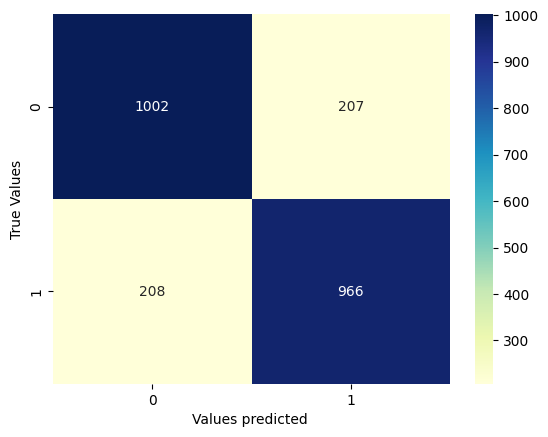

In [74]:
#confusion matrix depicts that the model predicts the 1002 positive reviews and 966 negative reviews 
#We can also infer that the model predicted 208 positive reviews are negative and 207 negative reviews as positive.
matrixOfConfusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matrixOfConfusion, annot = True, fmt = '.0f',cmap="YlGnBu")
plt.xlabel ('Values predicted ')
plt.ylabel ('True Values')

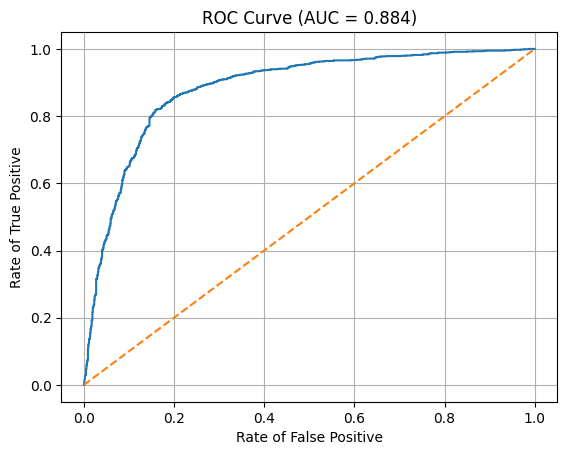

In [75]:
#The ROC curve plotting across TPR vs FPR. How well the model predicts can be infered from the AUC score, 
# We have achieved 88.4% of AUC Score hence the model performs well since higher the AUC Score the better the model prediction

y_prob_pred  = navieBayes.predict_proba(test_vector)[:,1]
fpr, tpr, threshold = roc_curve (y_test, y_prob_pred, pos_label = 1)
roc_auc_score = roc_auc_score (y_test, y_prob_pred)

plt.plot (fpr, tpr)
plt.plot([0,1], '--')
plt.xlabel ('Rate of False Positive')
plt.ylabel('Rate of True Positive')
plt.title ("ROC Curve (AUC = {:.3f})".format(roc_auc_score))
plt.grid()
plt.show()